In [34]:
import pandas as  pd
import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap
from pprint import pprint as pp

In [35]:
alfn =  'openflights/airlines.csv'
apfn =  'openflights/airports.csv'
rtfn =  'openflights/geo_routes.csv'

airlines = pd.read_csv(alfn)
airports = pd.read_csv(apfn)
geo_routes = pd.read_csv(rtfn)

pp('airlines')
print(airlines.iloc[0,:])
pp('airports')
print(airports.iloc[0,:])
pp('routes')
print(geo_routes.iloc[0,:])


'airlines'
id                       1
name        Private flight
alias                   \N
iata                     -
icao                   NaN
callsign               NaN
country                NaN
active                   Y
Name: 0, dtype: object
'airports'
id                              1
name                       Goroka
city                       Goroka
country          Papua New Guinea
code                          GKA
icao                         AYGA
latitude                 -6.08169
longitude                 145.392
altitude                     5282
offset                         10
dst                             U
timezone     Pacific/Port_Moresby
Name: 0, dtype: object
'routes'
airline           2B
source           AER
dest             KZN
equipment        CR2
start_lon    39.9566
end_lon      49.2787
start_lat    43.4499
end_lat      55.6062
Name: 0, dtype: object


In [36]:
#4
m = Basemap(projection="merc",llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)

In [37]:
#5 convert longitudes and latitudes to mercator x,y coordinates
x,y = m(airports.longitude.tolist(), airports.latitude.tolist())

/Users/zimine/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/zimine/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


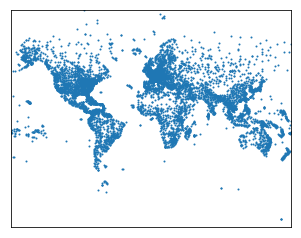

In [38]:
#6
m.scatter(x,y,s=1)  ## coordinates of all airports in the world

/Users/zimine/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/zimine/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


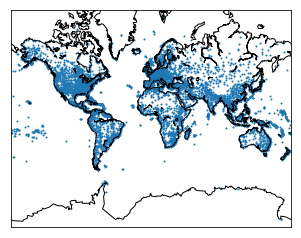

In [39]:
#7
m.scatter(x,y,s=1)
m.drawcoastlines()
plt.show()

/Users/zimine/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/zimine/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


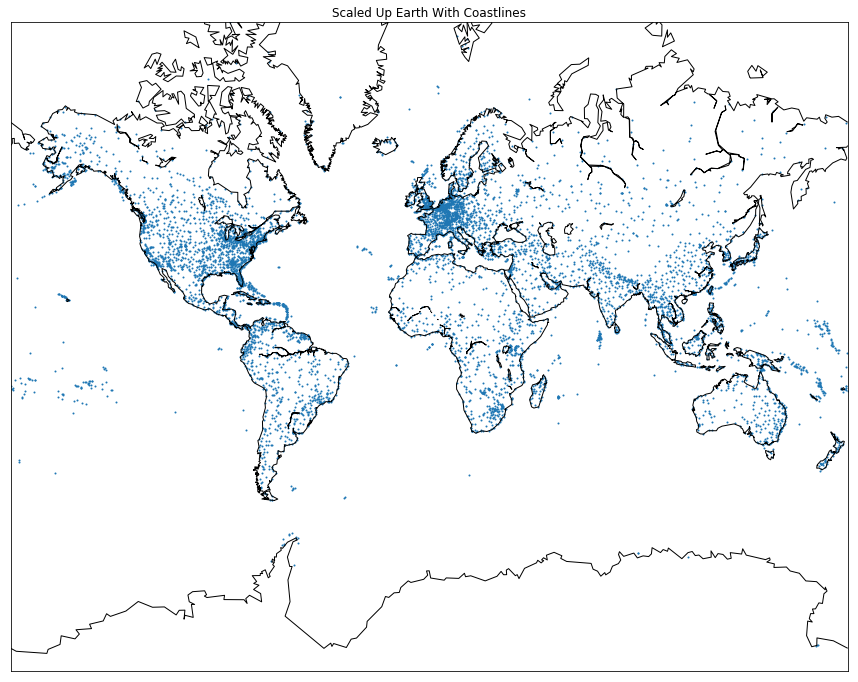

In [40]:
#8
m = Basemap(projection="merc",llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
x,y = m(airports.longitude.tolist(), airports.latitude.tolist())

fig, ax = plt.subplots(figsize=(15,20))
plt.title("Scaled Up Earth With Coastlines")
m.scatter(x, y, s=1)
m.drawcoastlines()
plt.show()


/Users/zimine/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/zimine/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/zimine/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/zimine/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


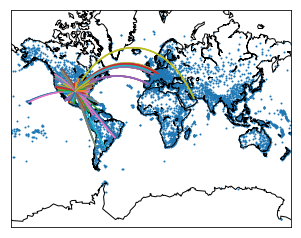

In [43]:
#10
#func to create circles
def create_great_circles(df):
    for index, row in df.iterrows():
        end_lat, start_lat = row['end_lat'], row['start_lat']
        end_lon, start_lon = row['end_lon'], row['start_lon']
        
        if abs(end_lat - start_lat) < 180:
            if abs(end_lon - start_lon) < 180:
                m.drawgreatcircle(start_lon, start_lat, end_lon, end_lat)
                
dfw = geo_routes[geo_routes['source'] == "DFW"]
create_great_circles(dfw)

fig, ax = plt.subplots(figsize=(15,20))
plt.title("Scaled Up Earth With Coastlines")
m.scatter(x, y, s=1)
m.drawcoastlines()
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67428 entries, 0 to 67427
Data columns (total 8 columns):
airline      67428 non-null object
source       67428 non-null object
dest         67428 non-null object
equipment    67410 non-null object
start_lon    67428 non-null float64
end_lon      67428 non-null float64
start_lat    67428 non-null float64
end_lat      67428 non-null float64
dtypes: float64(4), object(4)
memory usage: 4.1+ MB
